# Hierarchical clustering

One main disadvantage of K-Means is that it needs us to pre-enter the number of clusters (K). 
Hierarchical clustering is an alternative approach which does not need us to give the value of K 
beforehand and also, it creates a beautiful tree-based structure for visualization.
Here, we are going to discuss the bottom-up (or Agglomerative) approach of cluster building. We 
start by defining any sort of similarity between the datapoints. Generally, we consider the Euclidean 
distance. The points which are closer to each are more similar than the points which re farther away. 
The Algorithms starts with considering all points as separate clusters and then grouping pints 
together to form clusters.

## The Algorithm:
1. Begin with n observations and a measure (such as Euclidean distance) of all the n(n−1)/2 
pairwise dissimilarities (or the Euclidean distances generally). Treat each observation as its 
own cluster. Initially, we have n clusters.

2. Compare all the distances and put the two closest points/clusters in the same cluster. The 
dissimilarity (or the Euclidean distances) between these two clusters indicates the height in 
the dendrogram at which the fusion line should be placed.

3. Compute the new pairwise inter-cluster dissimilarities (or the Euclidean distances) among 
the remaining clusters.

4. Repeat steps 2 and 3 till we have only one cluster left.

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [2]:


X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])


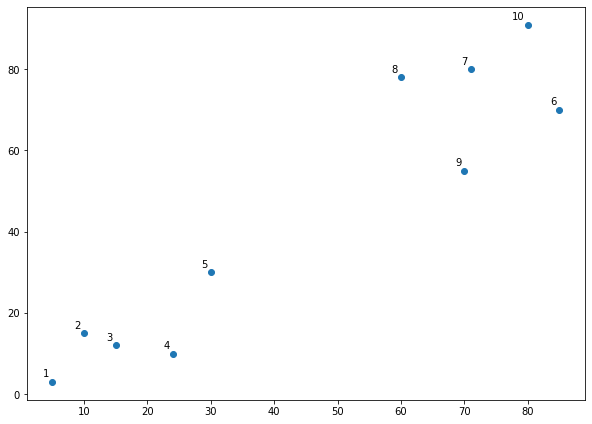

In [4]:

# Let's plot the above data points. To do so, execute the following code:



labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

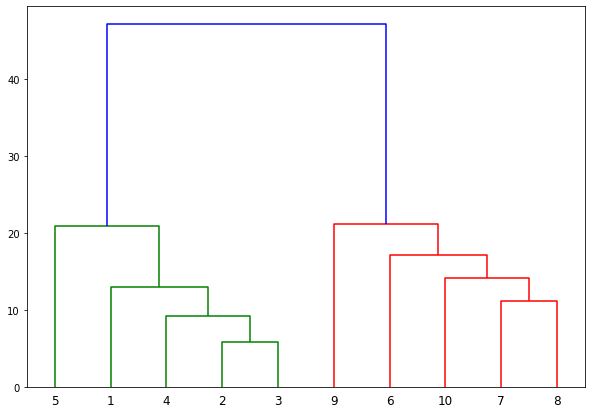

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [6]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [7]:
print(cluster.labels_)

[1 1 1 1 1 0 0 0 0 0]


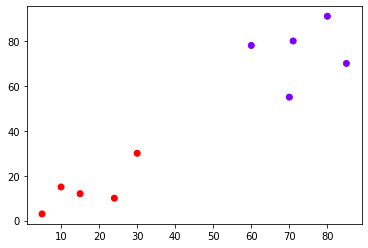

In [8]:
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')

In [13]:
customer_data = pd.read_csv('/content/shopping_data')

In [14]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
customer_data.shape

(200, 5)

In [16]:
data = customer_data.iloc[:, 3:5].values

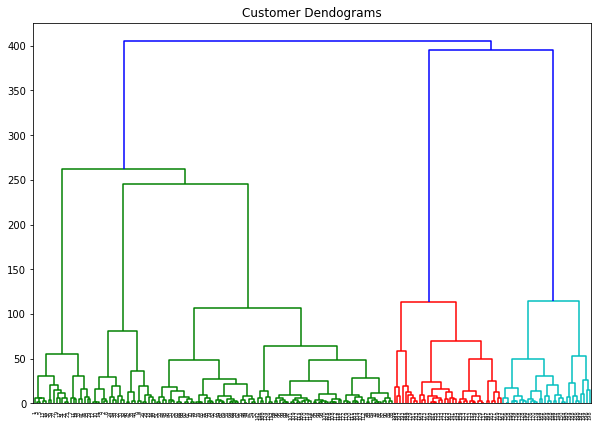

In [17]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [18]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

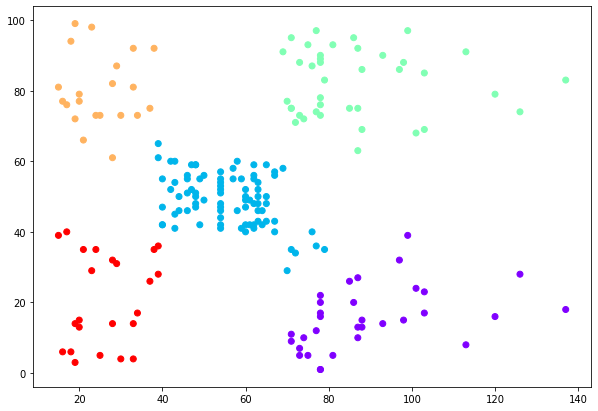

In [19]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')